**QUESTION:**

Fisher iris data set (iris.mat) contains 150 samples of three categories of iris flowers. Corresponding to each sample, the petal width, petal length, sepal width and sepal length are measured (in cms). In order to examine whether the flowers can be classified based on these attributes, as a first step PCA is applied to reduce the dimensionality.

Determine how many relevant PCs have to be retained based on 95% variance captured. Report the eigenvalues, the loadings vectors for the selected PCs and scores matrix corresponding to the selected PCs, reconstructed attributes based on retained PCs and the sum squared residuals between original and reconstructed attributes.

Use 70% of the samples in each category for applying PCA and the remaining for cross validation. Determine the optimal number of PCs to be retained based cross validation (predicted sum square of residuals on cross validation set).

**PART-A:**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-data/iris.mat


Importing necessary libraries.

In [3]:
import scipy.io
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Loading the iris dataset using "scipy.io.loadmat" function.

In [4]:
iris=scipy.io.loadmat("/kaggle/input/iris-data/iris.mat")

Finding the data in the dictionary using "items" function.

In [5]:
iris.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Feb 28 10:45:38 2011'), ('__version__', '1.0'), ('__globals__', []), ('iris', array([[5.1, 3.5, 1.4, 0.2, 7. , 3.2, 4.7, 1.4, 6.3, 3.3, 6. , 2.5],
       [4.9, 3. , 1.4, 0.2, 6.4, 3.2, 4.5, 1.5, 5.8, 2.7, 5.1, 1.9],
       [4.7, 3.2, 1.3, 0.2, 6.9, 3.1, 4.9, 1.5, 7.1, 3. , 5.9, 2.1],
       [4.6, 3.1, 1.5, 0.2, 5.5, 2.3, 4. , 1.3, 6.3, 2.9, 5.6, 1.8],
       [5. , 3.6, 1.4, 0.2, 6.5, 2.8, 4.6, 1.5, 6.5, 3. , 5.8, 2.2],
       [5.4, 3.9, 1.7, 0.4, 5.7, 2.8, 4.5, 1.3, 7.6, 3. , 6.6, 2.1],
       [4.6, 3.4, 1.4, 0.3, 6.3, 3.3, 4.7, 1.6, 4.9, 2.5, 4.5, 1.7],
       [5. , 3.4, 1.5, 0.2, 4.9, 2.4, 3.3, 1. , 7.3, 2.9, 6.3, 1.8],
       [4.4, 2.9, 1.4, 0.2, 6.6, 2.9, 4.6, 1.3, 6.7, 2.5, 5.8, 1.8],
       [4.9, 3.1, 1.5, 0.1, 5.2, 2.7, 3.9, 1.4, 7.2, 3.6, 6.1, 2.5],
       [5.4, 3.7, 1.5, 0.2, 5. , 2. , 3.5, 1. , 6.5, 3.2, 5.1, 2. ],
       [4.8, 3.4, 1.6, 0.2, 5.9, 3. , 4.2, 1.5, 6.4, 2.7, 5.3, 1.9],
       [4.8

Finding the keys of the dictionary.

In [6]:
print(iris.keys())

dict_keys(['__header__', '__version__', '__globals__', 'iris'])


Filtering our required data from the dictionary 

In [7]:
print(iris["iris"])

[[5.1 3.5 1.4 0.2 7.  3.2 4.7 1.4 6.3 3.3 6.  2.5]
 [4.9 3.  1.4 0.2 6.4 3.2 4.5 1.5 5.8 2.7 5.1 1.9]
 [4.7 3.2 1.3 0.2 6.9 3.1 4.9 1.5 7.1 3.  5.9 2.1]
 [4.6 3.1 1.5 0.2 5.5 2.3 4.  1.3 6.3 2.9 5.6 1.8]
 [5.  3.6 1.4 0.2 6.5 2.8 4.6 1.5 6.5 3.  5.8 2.2]
 [5.4 3.9 1.7 0.4 5.7 2.8 4.5 1.3 7.6 3.  6.6 2.1]
 [4.6 3.4 1.4 0.3 6.3 3.3 4.7 1.6 4.9 2.5 4.5 1.7]
 [5.  3.4 1.5 0.2 4.9 2.4 3.3 1.  7.3 2.9 6.3 1.8]
 [4.4 2.9 1.4 0.2 6.6 2.9 4.6 1.3 6.7 2.5 5.8 1.8]
 [4.9 3.1 1.5 0.1 5.2 2.7 3.9 1.4 7.2 3.6 6.1 2.5]
 [5.4 3.7 1.5 0.2 5.  2.  3.5 1.  6.5 3.2 5.1 2. ]
 [4.8 3.4 1.6 0.2 5.9 3.  4.2 1.5 6.4 2.7 5.3 1.9]
 [4.8 3.  1.4 0.1 6.  2.2 4.  1.  6.8 3.  5.5 2.1]
 [4.3 3.  1.1 0.1 6.1 2.9 4.7 1.4 5.7 2.5 5.  2. ]
 [5.8 4.  1.2 0.2 5.6 2.9 3.6 1.3 5.8 2.8 5.1 2.4]
 [5.7 4.4 1.5 0.4 6.7 3.1 4.4 1.4 6.4 3.2 5.3 2.3]
 [5.4 3.9 1.3 0.4 5.6 3.  4.5 1.5 6.5 3.  5.5 1.8]
 [5.1 3.5 1.4 0.3 5.8 2.7 4.1 1.  7.7 3.8 6.7 2.2]
 [5.7 3.8 1.7 0.3 6.2 2.2 4.5 1.5 7.7 2.6 6.9 2.3]
 [5.1 3.8 1.5 0.3 5.6 2.5 3.9 1

Finding the shape of the data.

In [8]:
print(iris["iris"].shape)

(50, 12)


As we know that the Fisher iris data set contains 150 samples of three categories of iris flowers and each category has petal width, petal length, sepal width and sepal length that are measured (in cms) respectively. Reframing the above (50,12) matrix into matrix of shape (150,4).

In [9]:
iris_data=np.zeros((150,4))
for i in range(50):
        iris_data[i]=iris["iris"][i][:4]
for i in range(50,100):
        iris_data[i]=iris["iris"][i-50][4:8]
for i in range(100,150):
        iris_data[i]=iris["iris"][i-100][8:12]
print(iris_data)
print(iris_data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

From the above matrix we can see that the shape of the matrix is (150,4) where the 150 rows are the samples of the three categories flowers and the 4 columns are the petal width, petal length, sepal width and sepal length respectively.

**Steps invovled in PCA**

1) Standardize the data

2) Calculate the covariance matrix

3) Calculate the eigenvectors and the eigenvalues of the covariance matrix

4) Rank the eigenvectors by its corresponding eigenvalues and obtain the principal components with its column vectors corresponding to the top k eigenvectors.

**Step 1: Normalize the data**

First step is to normalize the data that we have so that PCA works properly.
This is done by subtracting the respective means from the numbers in the respective column.


In [10]:
std_iris_data = StandardScaler().fit_transform(iris_data)
std_iris_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

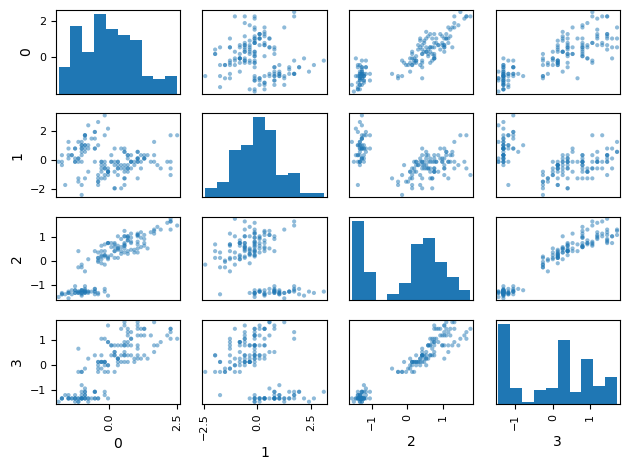

In [11]:
### Understanding the data using pair plot:
iris_df = pd.DataFrame(std_iris_data)
axes = pd.plotting.scatter_matrix(iris_df)
plt.tight_layout()

**Step 2: Calculate the covariance matrix**

In [12]:
cov_matrix = np.cov(iris_df.T)
print(cov_matrix.shape)
print('Covariance Matrix \n%s', cov_matrix)

(4, 4)
Covariance Matrix 
%s [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


**Step 3: Calculate the eigenvalues and eigenvectors**

In [13]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(len(eig_vals))
print(eig_vecs.shape)

4
(4, 4)


In [14]:
# Printing the Eigen vectors and Eigen values
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

 Eigen Values 
%s [2.93808505 0.9201649  0.14774182 0.02085386]


To know the variance explained by the individual PC, pair up the respective eigen vectors and values.

In [15]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs_sorted = sorted(eigen_pairs, reverse=True)

In [16]:
eig_vals_sorted = [eigen_pairs_sorted[i][0] for i in range (len(eig_vals))]
eig_vecs_sorted = [eigen_pairs_sorted[i][1] for i in range (len(eig_vals))]

In [17]:
# Cumulative Variance Explained:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 72.96244541  95.8132072   99.48212909 100.        ]


The first three principal components explain 99% of the variance in the data and these three PCA will have to be named because they represent composite of original dimensions.

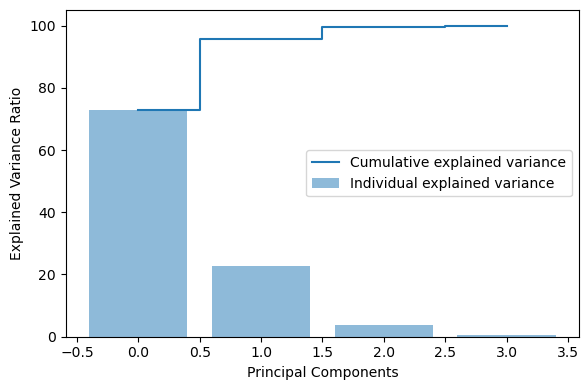

In [18]:
# Summary Plot of the cumulative Variance Explained:

plt.figure(figsize=(6 , 4))
plt.bar(range(4), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(4), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

We can also determine the number of PCA components based on how much variation we want the data to explain. Let's say we want to see hoy many PCA compenents explain 95% of the variance in data.

In [19]:
# find the length of the variable that explains cumulative Variance Explained and customize it to the variation we want:

len(cum_var_exp[cum_var_exp<96])

2

In the above data, two variables explain 95% of the variation in the data.

In [20]:
from sklearn import decomposition
# apply PCA
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(std_iris_data)

If we look at PCA more formally, it turns out that the PCA is based on a decomposition of the data matrix X into two matrices V and U:
The two matrices V and U are orthogonal. The matrix V is usually called the loadings matrix, and the matrix U is called the scores matrix. The loadings can be understood as the weights for each original variable when calculating the principal component. The matrix U contains the original data in a rotated coordinate system.

In [21]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'])
loadings

,PC1,PC2
0,0.521066,0.377418
1,-0.269347,0.923296
2,0.580413,0.024492
3,0.564857,0.066942


In [22]:
U,D,VT=np.linalg.svd(cov_matrix)
print("loadings",U)
print("scores",VT)

loadings [[-0.52106591 -0.37741762  0.71956635  0.26128628]
 [ 0.26934744 -0.92329566 -0.24438178 -0.12350962]
 [-0.5804131  -0.02449161 -0.14212637 -0.80144925]
 [-0.56485654 -0.06694199 -0.63427274  0.52359713]]
scores [[-0.52106591  0.26934744 -0.5804131  -0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]


The reorientation of data from their original axes to the Principal components can be done by the following formula.

Final Data Set= Standardized Original Data Set * FeatureVector

In [23]:
loadings_matrix=pca.components_.T
loadings_matrix

array([[ 0.52106591,  0.37741762],
       [-0.26934744,  0.92329566],
       [ 0.5804131 ,  0.02449161],
       [ 0.56485654,  0.06694199]])

In [24]:
FinalDataSet=np.dot(std_iris_data,pca.components_.T)
FinalDataSet

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [25]:
print(FinalDataSet.shape)

(150, 2)


From the above matrix, we can clearly see that the dimensions of the original dataset (150,4) has reduced to (150,2) with the help of PCA.

**PART-B:**

Using 70% of the samples in each category for applying PCA and the remaining for testing.

In [26]:
# Test-Train split

X_train, X_test = train_test_split(iris_data, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [27]:
# function for standardizing the data

def Standardize(X):
    
    # calcualte the mean of each column mu   
    mu = np.mean(X, axis = 0) 
    
    # Substract the mean from X
    X = X - mu  
    
    # calcualte the standard deviation of each column std
    std = np.std(X, axis = 0)  
    
    # handleing zero standard deviation
    std_filled = std.copy()
    std_filled[std == 0] = 1.0
    
    # calculate standardized X called Xbar
    Xbar = (X-mu) / std_filled  
    
    return Xbar, mu, std

In [28]:
# function for calcualting eigen values and eigen vectors

def eig(S):
    
    # calculate the eigen values and eigen vectors
    eig_val, eig_vec = np.linalg.eigh(S)  
    
    # sorting them in decrasing order
    sorted_eig  = np.argsort(-eig_val)
    eig_val = eig_val[sorted_eig]
    eig_vec = eig_vec[:, sorted_eig]
    
    return (eig_val, eig_vec)

In [29]:
# function for projection matrix

def projection_matrix(B):
    
    # calculate the projection matrix P
    P = B @ B.T 
    
    return P

In [30]:
# implementing PCA

def PCA(X, num_components):
    
    # calculate the data covariance matrix S
    S = np.cov(X)  
    
    # now find eigenvalues and corresponding eigenvectors for S by implementing eig().
    eig_vals, eig_vecs = eig(S)
    
    # select eigen vectors
    U = eig_vecs[:, range(num_components)]
    
    # reconstruct the data from the lowerdimensional representation
    # to do this, we first need to find the projection_matrix
    # which projects our input data onto the vector space spanned by the eigenvectors
    P = projection_matrix(U) # projection matrix
    
    return P

In [31]:
# standardizing

Xbar_train, mu_train, std_train = Standardize(X_train)
Xbar_test, mu_test, std_test = Standardize(X_test)

In [32]:
# function for mean square error

def mse(predict, actual):
    return np.square(predict - actual).sum(axis = 1).mean()

In [33]:
# calculating loss and reconstructing the iris_data

loss = []
reconstructions = []
max_components = len(X_train.T)
print("max_components: ",max_components)
for num_component in range(1, max_components + 1):
    projection = PCA(Xbar_train.T, num_component)
    reconst = Xbar_test @ projection
    error = mse(reconst, Xbar_test)
    reconstructions.append(reconst)
    loss.append((num_component, error))

max_components:  4


In [34]:
# "unstandardize" the reconstructed samples

reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions * std_test + mu_test 
loss = np.asarray(loss)
print(loss)

[[1.00000000e+00 8.79588992e+01]
 [2.00000000e+00 6.64335770e+00]
 [3.00000000e+00 1.30502372e-01]
 [4.00000000e+00 6.05694412e-29]]


**Conclusion:**

From the above output, we can clearly see that the loss is reducing as the number of PCs increases.
The more the principle components used, the better is the accuracy of reconstruction. So the optimal number of PCs to be retained is 2.